## Figure notebook for annotating multiomic (RNA+ATAC-seq) datasets (from neurips 2021, S1D1 multiome)

Last updated: 3/7/2023

Author: Yang-Joon Kim

Notse: 
- We will use the neurips 2021, s1d1 (RNA+ATAC) objects - both RNA and ADT modalities(assays)
- Note that the adata.X is normalized differently for RNA and ADT (RNA is log-normalized, whereas ADT is centered-log-ratio transformed). Raw counts are saved in the "counts" layer.
- We will use a subset of cell-types for UMAP visualizations for simplicity
- We used two different color palettes for RNA and ADT to make those look visually distinctive.
- RNA: Set1 (default) and viridis (continuous), ADT: Set2 and magma (continuous)
- [NOT DONE YET] We will generate the whole figure using matplotlib (following Jonathan's Jupyter notebooks).


In [4]:
import os
import sys
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default

# Editable text and proper LaTeX fonts in illustrator
# matplotlib.rcParams['ps.useafm'] = True
# Editable fonts. 42 is the magic number
mpl.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
# mpl.rcParams['mathtext.fontset'] = 'cm'
# %matplotlib inline
# change font (for texts)
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"

sns.set(style='whitegrid', context='paper')

# ignore warnings regarding fonts
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')


ModuleNotFoundError: No module named 'scanpy'

In [6]:
# load utilities module
import sys
sys.path.append("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/utilities/")
import color_schema

In [7]:
# define the figure path
figpath = "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/figures/Figure_RNA_ATAC_multiome/"
sc.settings.figdir = figpath
# set_plotting_style()

# Load the data object

In [8]:
adata = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v2.h5ad")
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015'
    var: 'assay'
    obsm: 'X_pca', 'X_umap_ATAC', 'X_umap_RNA'

In [11]:
#adata_leiden = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/umap_RNA.h5ad")

# copy over the leiden clustering results from the exCellxgene
# adata.obs["GEX_leiden_015"] = adata_leiden.obs["GEX_leiden_015"]
# adata.obs["ATAC_leiden_015"] = adata_leiden.obs["ATAC_leiden_015"]

# save the master object for plotting
# adata.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v2.h5ad")

## Figure scheme

- (A): 
- (B): 
- (C): 
- (D):
- (E):


### markers from neurips 2021 annotation

In [7]:
# # marker genes for RNA
# marker_genes = {
#     'CD14+ Mono': ['FCN1', 'CD14'],
#     'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
#     'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'FOS', 'JUN', 'EGR1', 'KLF4', 'PLAUR'],
#     'cDC1': ['CLEC9A', 'CADM1'],
#     'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'], # TFRC negative
#     'Normoblast': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],  # TFRC positive
#     'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
#     'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers   # CRACD as well, but not present in data
#     'NK': ['GNLY', 'NKG7', 'CD247', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'], # GRIK4 as well, but not present in data
#     'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
#     'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],  # new: STMN1
#     'Naive CD20+ B - IGKC+':['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM', 'IGKC'],
#     'Naive CD20+ B - IGKC-':['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM', 'IGKC'], # IGKC negative
#     'B1 B - IGKC+':['MS4A1', 'SSPN', 'ITGB1','IGKC', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'],# Note IGHD and IGHM are negative markers #ZNF215 not in data
#     'B1 B - IGKC-':['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM', 'IGKC'],# Note IGKC, IGHD and IGHM are negative markers #ZNF215 not in data
#     'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
#     'Plasma cell': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
#     'Plasmablast': ['XBP1', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker   # RF4 as well, but not present in data
#     'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
#     'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
#     'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
#     'T activation': ['CD69', 'CD38'], # CD69 much better marker!
#     'T naive': ['LEF1', 'CCR7', 'TCF7'],
#     'T reg': ['FOXP3'],
#     'Effector CD4+ T': ['KLRB1', 'CD4', 'PDCD1', 'TNF'],
#     'Effector CD8+ T': ['KLRK1', 'GZMH', 'CD8A', 'CD8B'],
#     'MAIT': ['KLRB1', 'CD8A', 'GZMK', 'IL7R'],
#     'gdT': ['KLRC2', 'KLRF1', 'FCGR3A', 'GZMB', 'GZMH'],
#     'pDC': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
#     'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'], 
#     'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'], 
#     'MK/E prog': ['ZNF385D', 'ITGA2B', 'PLCB1'], # 'RYR3' as well,  but not present in data
# }


In [8]:
# #ATAC
# marker_genes_atac = {
#     'CD14+ Mono': ['TREM1', 'FPR1'],
#     'CD16+ Mono': ['LYN', 'TCF7L2'],
#     'ID2-hi myeloid prog': ['KLF4'],
#     'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
#     'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
#     'Erythroblast': ['GATA1', 'MKI67'],
#     'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
#     'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
#     'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
#     'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
#     'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
#     'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
#     'Transitional B': ['MME', 'CD38', 'CD24'],
#     'Plasma cells': ['DUSP22', 'FNDC3B'],
#     'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
#     'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
#     'CD8+ T': ['CD8A', 'CD8B'],
#     'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
#     'G/M prog': ['MPO','NT5DC3'],
#     'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
#     'MK/E prog': ['DNAJC6']
# }

# UMAP plots with different labels/annotations

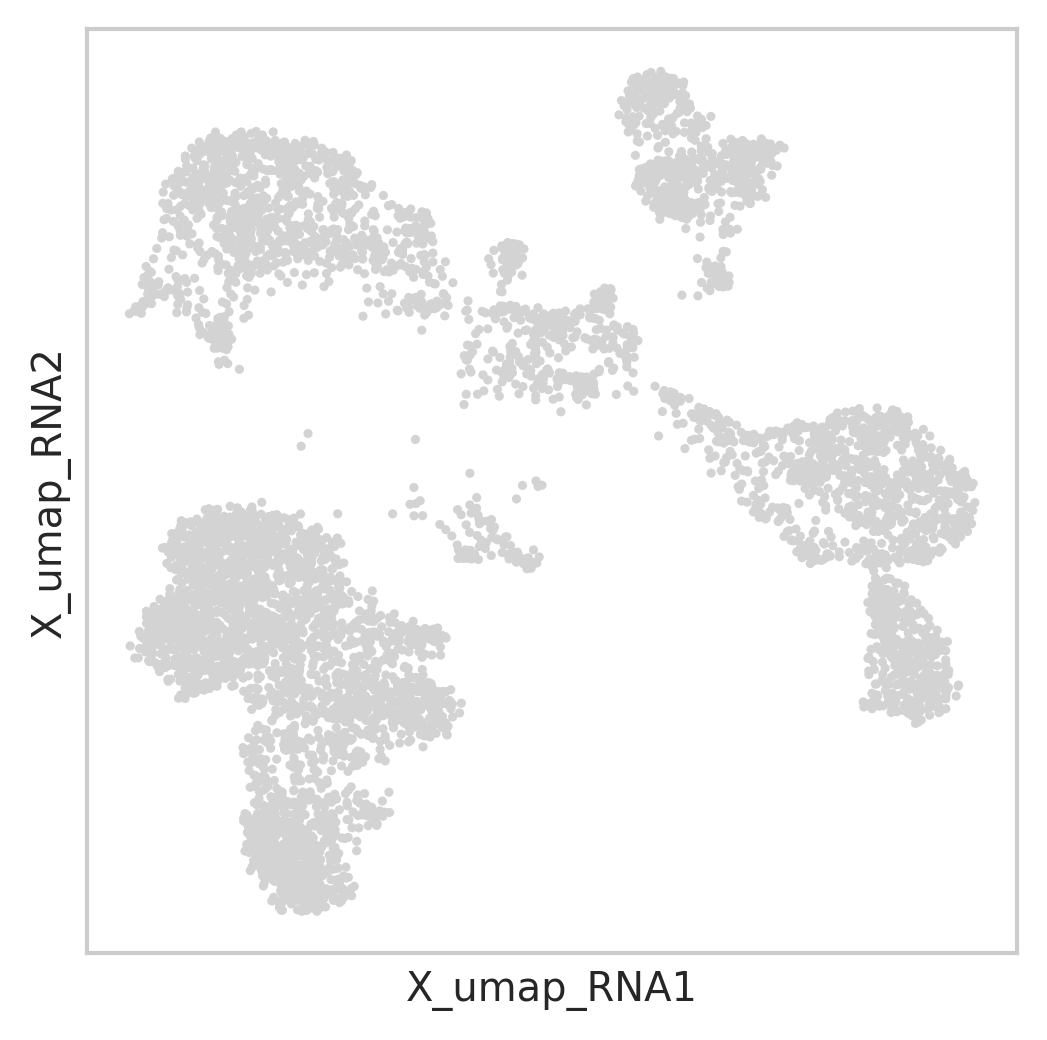

In [15]:
# plot the RNA UMAP without any labels
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA" ,legend_fontsize=8, save="_no_color.pdf")

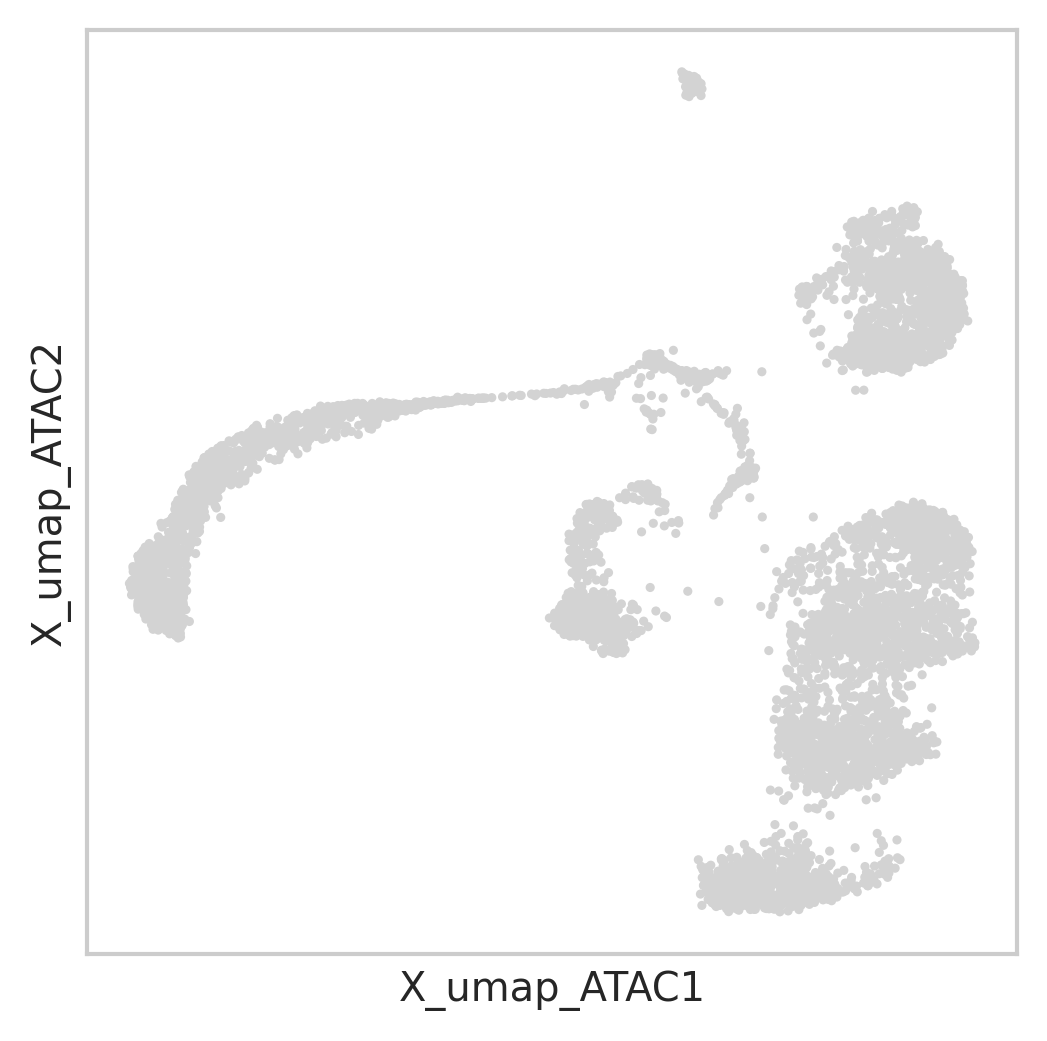

In [16]:
# plot the ATAC UMAP without any labels
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC" ,legend_fontsize=8,save="_no_color.pdf")

# Leiden clustering on GEX and ATAC

- We performed leiden clustering on exCellxgene for GEX and ATAC, respectively. Then, we exported the clustering results to adata.obs with different resolutions.
- We will use the leiden resolution of 0.15 as that gave us reasonable number of clusters for the initial inspectioin of the data.



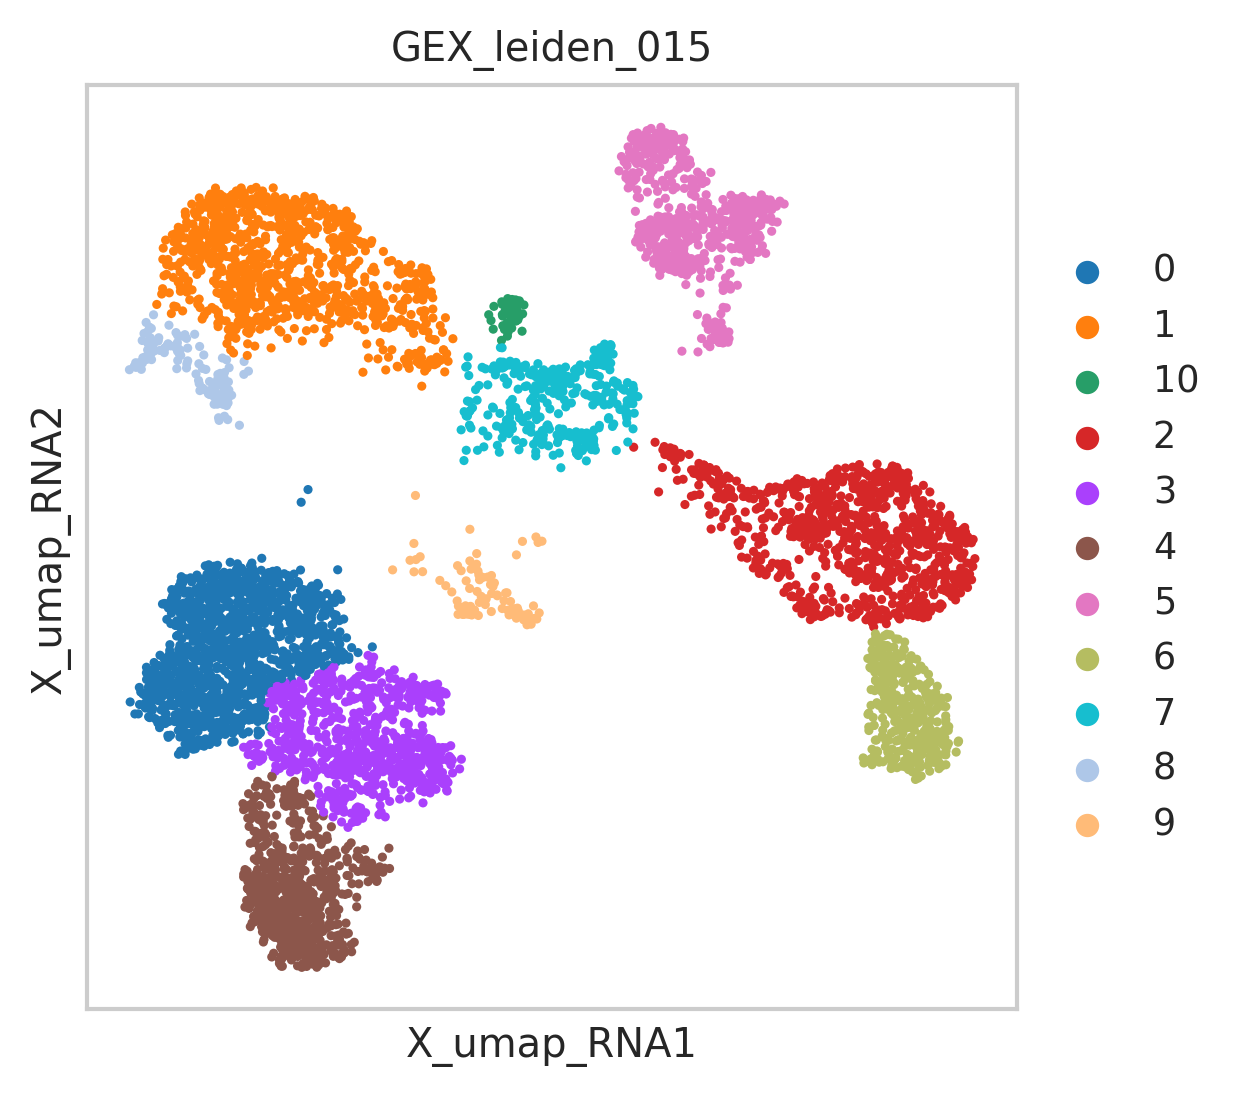

In [19]:
# GEX UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="GEX_leiden_015",
                    save="_leiden_GEX_015.pdf")

In [118]:
# redefine the colormap in ATAC as Dark2 only has 8 colors.
# We got the 9th color from ChatGPT's suggestion of purple-themed color that matches with the Dark2 style.

# define the Dark2 color palette
# dark2 = plt.get_cmap('Dark2').colors
dark2 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

# add new colors to the palette
new_colors = ['#A95C68', '#587B7F', '#8B6D9C']
dark2_extended = dark2 + new_colors

In [20]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('GEX_leiden_015_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'])])
With overloaded keys:
	['neighbors'].

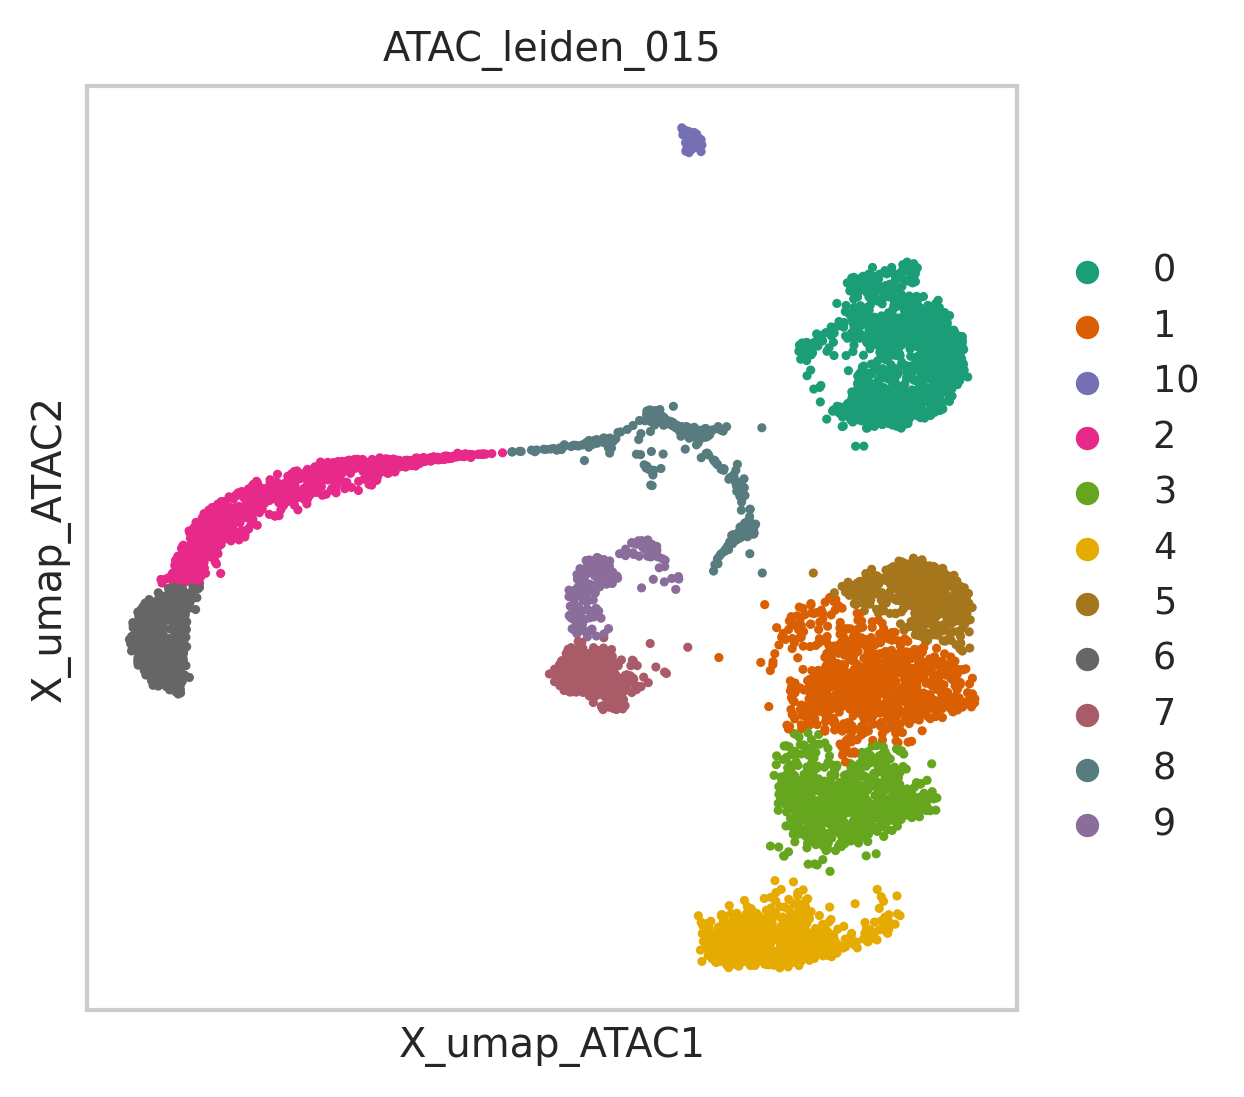

In [23]:
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="ATAC_leiden_015", palette=dark2_extended,
                    save="_leiden_ATAC_015.pdf")

## Sankey diagram between GEX and ATAC leiden clustering results

### To-Do: It would be great if we can filter out the source-target pair whose connection is less than 10 cells (or 20 cells), to emphasize the major flows.

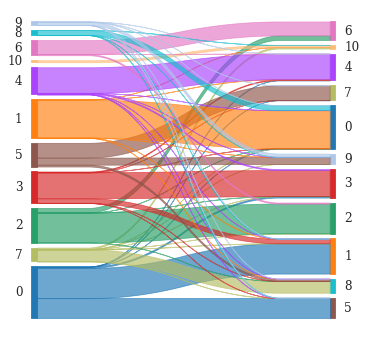

In [106]:
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

# define the colors as the Set1 as the RNA clusters
colors = {
    "0": "#1f77b4",
    "1": "#ff7f0e",
    "2": "#279e68",
    "3": "#d62728",
    "4": "#aa40fc",
    "5": '#8c564b',
    "6": '#e377c2',
    "7": '#b5bd61',
    "8": '#17becf',
    "9": '#aec7e8',
    "10": '#ffbb78',
    #"gray":'#808080'
}

# # set the threshold for the links
# threshold = 10

# # Filter the DataFrame to include only the columns you need
# df = pd.DataFrame({"GEX_leiden_015":adata.obs["GEX_leiden_015"],
#                    "ATAC_leiden_015":adata.obs["ATAC_leiden_015"]})

# # Create a new column "link_value" that contains the values for the links
# df["link_value"] = 1

# # Group the DataFrame by the source and target columns and sum the link values
# df_grouped = df.groupby(["GEX_leiden_015", "ATAC_leiden_015"]).sum()

# # Create a new column "link_color" that contains the colors for the links
# df_grouped["link_color"] = df_grouped.index.get_level_values(0).map(colors)

# # Create a new column "link_alpha" that contains the alpha values for the links
# # df_grouped["link_alpha"] = 1.0

# # Filter out the links with values below the threshold
# # df_grouped.loc[df_grouped["link_value"] < threshold, "link_color"] = 
# # df_grouped.loc[df_grouped["link_value"] < threshold, "link_alpha"] = 0
# df_grouped.loc[df_grouped["link_value"]<threshold,"link_value"]=0

# # Convert the Pandas DataFrame to two lists of nodes and links
# nodes = list(set(df_grouped.index.get_level_values(0)).union(set(df_grouped.index.get_level_values(1))))
# links = [tuple(x) + (y,z) for x,y,z in zip(df_grouped.index, df_grouped["link_value"], df_grouped["link_color"])]

# # Create the Sankey diagram
# fig = sankey(nodes, links, aspect=20, fontsize=12)

# Save the diagram to a file
#plt.savefig("GEX_ATAC_leiden_sankey.pdf", dpi=300)

fig = sankey(adata.obs["GEX_leiden_015"], adata.obs["ATAC_leiden_015"], aspect=20, colorDict=colors, fontsize=12)
plt.savefig("GEX_ATAC_leiden_sankey.pdf", dpi=300)

In [56]:
df = pd.DataFrame({"GEX_leiden_015":adata.obs["GEX_leiden_015"],
                   "ATAC_leiden_015":adata.obs["ATAC_leiden_015"]})
df

,GEX_leiden_015,ATAC_leiden_015
AAACAGCCAATTAAGG-1,0,5
AAACAGCCAGGCTGTT-1,7,8
AAACATGCAAAGCGCA-1,0,1
AAACATGCAATAACCT-1,2,2
...,...,...
TTTGTGTTCATTTGCT-1,0,1
TTTGTGTTCGCCTAAG-1,0,1
TTTGTTGGTACGGTAC-1,0,5
TTTGTTGGTTCGGTAA-1,4,4


# Annotation/Exploration using exCellxgene - B cells

- last updated: 3/7/2023

Here, the annotation was originally done for all fine-grained cell-types by the neurips annotation team.

For visualization, we will merge some fine-grained annotations to make a "coarse" annotation named "manual_annotation". (Basically, merging some sub-populations identified using the surface protein markers).
- Coarse -
- Fine - 

In [98]:
# # We will transfer the cell-type annotation labels from Figure 2
# adata_manual = sc.read_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/snRNA-seq_neurips2021_multiome/s1d1_rna_processed_annotated_forViz.h5ad")
# adata_manual

AnnData object with n_obs × n_vars = 6224 × 17739
    obs: 'name_0', 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'pseudotime_order_GEX', 'manual_annotation', 'annotation_for_visualization'
    var: 'name_0', 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'mean', 'variance'
    obsm: 'X_latent_pca', 'X_pca', 'X_umap'
    layers: 'X', 'counts'
    obsp: 'N_pca', 'N_umap'

In [100]:
# # copy the annotation
# adata.obs["manual_annotation_fine"] = adata_manual.obs["manual_annotation"]
# adata.obs["manual_annotation_coarse"] = adata_manual.obs["annotation_for_visualization"]
                                                    

In [91]:
# edit the gene names as we've added "-RNA" or "-ATAC" to merge the two modalities
#RNA
marker_genes_rna = {
    'CD14+ Mono': ['FCN1', 'CD14'],
    'CD16+ Mono': ['TCF7L2', 'FCGR3A', 'LYN'],
    'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR'],
    'cDC1': ['CLEC9A', 'CADM1'],
    'cDC2': ['CLEC10A', 'FCER1A', 'CST3', 'COTL1', 'LYZ', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC'],
    'Erythroblast': ['MKI67', 'HBA1', 'HBB'],
    'Proerythroblast': ['CDK6', 'SYNGR1', 'HBM', 'GYPA'], # Note HBM and GYPA are negative markers
    'ILC': ['ID2', 'PLCG2', 'GNLY', 'SYNE1'],
    'Lymph prog': ['IGLL1', 'VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT'],
    'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
    'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
    'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
    'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
    'Plasmablast': ['XBP1', 'RF4', 'PRDM1', 'PAX5'],  # Note PAX5 is a negative marker
    'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
    'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
    'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
    'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A'],
    'T activation': ['CD69', 'CD38'], # CD69 much better marker!
    'T naive': ['LEF1', 'CCR7', 'TCF7'],
    'pDCs': ['GZMB', 'IL3RA', 'COBLL1', 'TCF4'],
    'G/M prog': ['MPO', 'BCL2', 'KCNQ5', 'CSF3R', 'PRTN3'],
    'HSC': ['NRIP1', 'MECOM', 'PROM1', 'CD34', 'NKAIN2'],
    'MK/E prog': ['ZNF385D', 'ITGA2B', 'RYR3', 'PLCB1'] # Note PLCB1 is a negative marker
}

for cell_type in marker_genes_rna:
    genes = marker_genes_rna[cell_type]
    new_genes = [gene + "-RNA" for gene in genes]
    marker_genes_rna[cell_type] = new_genes
    
marker_genes_rna

#ATAC
marker_genes_atac = {
    'CD14+ Mono': ['TREM1', 'FPR1'],
    'CD16+ Mono': ['LYN', 'TCF7L2'],
    'ID2-hi myeloid prog': ['KLF4'],
    'cDC2': ['TREM1', 'DMXL2'], # Note: DMXL2 should be negative
    'Reticulocyte': ['GATA1', 'HBA1', 'SLC4A1', 'SLC25A37', 'KLF1'],
    'Erythroblast': ['GATA1', 'MKI67'],
    'Proerythroblast': ['GATA2', 'CRACD', 'SYNGR1'],
    'ILC': ['SPON2', 'GZMB', 'PRF1', 'C69'], # Note CD69 should be negative
    'Lymph prog': ['MME', 'IGLL1', 'VPREB1', 'CD79B'],
    'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
    'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
    'Transitional B': ['MME', 'CD38', 'CD24'],
    'Plasma cells': ['DUSP22', 'FNDC3B'],
    'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
    'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative markers
    'CD8+ T': ['CD8A', 'CD8B'],
    'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247'],
    'pDCs': ['PTPRS', 'TCF4', 'KCNN3', 'DUSP22'],
    'G/M prog': ['MPO','NT5DC3'],
    'HSC': ['PRDM16','TAMALIN','MTRNR2L1'],
    'MK/E prog': ['DNAJC6']
}

for cell_type in marker_genes_atac:
    genes = marker_genes_atac[cell_type]
    new_genes = [gene + "-ATAC" for gene in genes]
    marker_genes_atac[cell_type] = new_genes
    
marker_genes_atac

{'CD14+ Mono': ['TREM1-ATAC', 'FPR1-ATAC'],
 'CD16+ Mono': ['LYN-ATAC', 'TCF7L2-ATAC'],
 'ID2-hi myeloid prog': ['KLF4-ATAC'],
 'cDC2': ['TREM1-ATAC', 'DMXL2-ATAC'],
 'Reticulocyte': ['GATA1-ATAC',
  'HBA1-ATAC',
  'SLC4A1-ATAC',
  'SLC25A37-ATAC',
  'KLF1-ATAC'],
 'Erythroblast': ['GATA1-ATAC', 'MKI67-ATAC'],
 'Proerythroblast': ['GATA2-ATAC', 'CRACD-ATAC', 'SYNGR1-ATAC'],
 'NK': ['CD160-ATAC', 'GNLY-ATAC', 'GRIK4-ATAC', 'CD247-ATAC'],
 'ILC': ['SPON2-ATAC', 'GZMB-ATAC', 'PRF1-ATAC', 'C69-ATAC'],
 'Lymph prog': ['MME-ATAC', 'IGLL1-ATAC', 'VPREB1-ATAC', 'CD79B-ATAC'],
 'Naive CD20+ B': ['MS4A1-ATAC', 'LYN-ATAC', 'CD74-ATAC', 'BLK-ATAC'],
 'B1 B': ['ITGB1-ATAC', 'MS4A1-ATAC', 'DUSP22-ATAC', 'EPHA4-ATAC'],
 'Transitional B': ['MME-ATAC', 'CD38-ATAC', 'CD24-ATAC'],
 'Plasma cells': ['DUSP22-ATAC', 'FNDC3B-ATAC'],
 'CD4+ T activated': ['JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD4+ T naive': ['BCL11B-ATAC', 'BACH2-ATAC', 'JAKMIP1-ATAC', 'C4orf50-ATAC'],
 'CD8+ T': ['CD8A-ATAC', 'CD8B-ATAC'],
 'pD

### marker genes for B cells (RNA)
- pan B cell markers: ["PAX5-RNA", "EBF1-RNA"]

### marker genes for B cell subtypes (RNA)
- 'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
- 'B1 B': ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'ZNF215', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM'], # Note IGHD and IGHM are negative markers
- 'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],

### marker genes for B cell subtypes (ATAC)
- 'Naive CD20+ B': ['MS4A1', 'LYN', 'CD74', 'BLK'],
- 'B1 B': ['ITGB1', 'MS4A1', 'DUSP22', 'EPHA4'],
- 'Transitional B': ['MME', 'CD38', 'CD24'],

## markers that I chose for visualization and further exploration
- Naive CD20+ B: ["IL4R-RNA", "IGHD-RNA"]
- B1 B: ["ITGB1-RNA", "SSPN-RNA"]
- Transitional B: ["MME-RNA", "CD24-RNA"]
    


# Re-embedding for RNA+ATAC

Goal: We will re-compute the UMAP for cell x RNA+ATAC count matrix, then see if the joint embedding increases the resolution of our data further.



In [112]:
adata

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse'
    var: 'assay'
    uns: 'pca'
    obsm: 'X_pca', 'X_umap_ATAC', 'X_umap_RNA', 'X_pca_RNA'
    varm: 'PCs'

In [108]:
adata.obsm["X_pca_RNA"] = adata.obsm["X_pca"]

In [110]:
sc.tl.pca(adata, svd_solver="arpack")

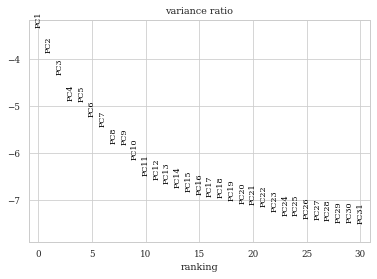

In [111]:
sc.pl.pca_variance_ratio(adata, log=True)

In [113]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

2023-03-07 20:53:09.201246: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


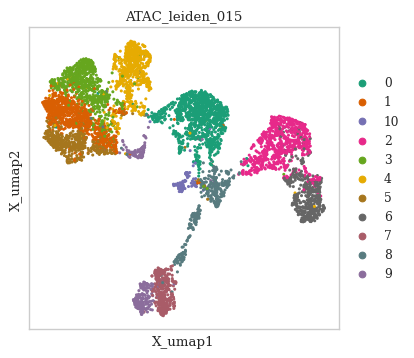

In [120]:
# ATAC UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
    sc.pl.embedding(adata, basis="X_umap", color="ATAC_leiden_015", palette=dark2_extended,
                    save="joint_leiden_ATAC_015.pdf")

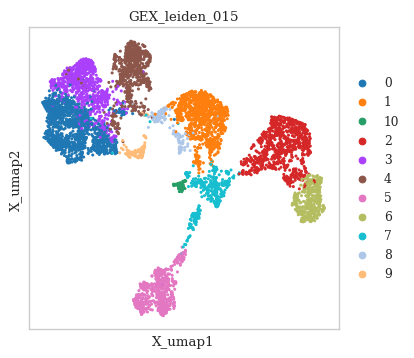

In [122]:
# RNA UMAP with leiden resolution of 0.15
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (100)}):
    sc.pl.embedding(adata, basis="X_umap", color="GEX_leiden_015",
                    save="joint_leiden_RNA_015.pdf")

In [115]:
adata.obsm["X_umap_joint"] = adata.obsm["X_umap"]

AnnData object with n_obs × n_vars = 6224 × 36852
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'leiden_final', 'atac_ann', 'cell_type', 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'rna_ann', 'cell_type_RNA', 'cell_type_ATAC', 'GEX_leiden_015', 'ATAC_leiden_015', 'manual_annotation_fine', 'manual_annotation_coarse'
    var: 'assay'
    uns: 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap_ATAC', 'X_umap_RNA', 'X_pca_RNA', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

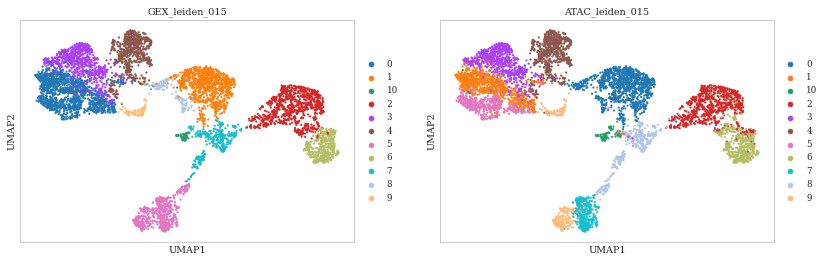

In [116]:
sc.pl.umap(adata, color=["GEX_leiden_015","ATAC_leiden_015"])

In [125]:
sc.tl.leiden(adata, resolution=0.5, key_added="joint_leiden_05")

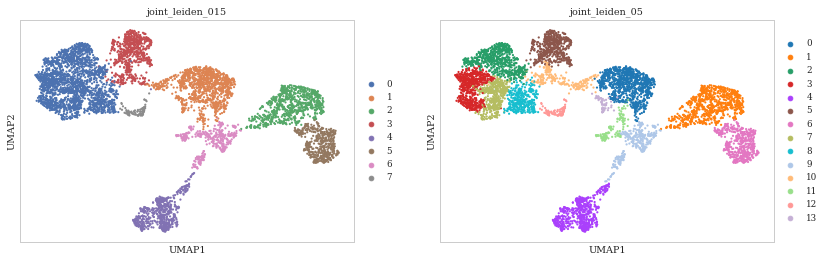

In [128]:
sc.pl.umap(adata, color=["joint_leiden_015", "joint_leiden_05"])

In [129]:
adata.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_joint_v3.h5ad")

# SIMBA (co-embedding of cells and features)

Chen, ..., Pinello, et al., 2022, biorxiv



In [138]:
pip uninstall simba

Found existing installation: simba 0.1.1
Uninstalling simba-0.1.1:
  Would remove:
    /home/yangjoon.kim/miniconda3/bin/simba
    /home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/simba-0.1.1.dist-info/*
    /home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/simba/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [134]:
import simba as si

In [137]:
help(si)

Help on package simba:

NAME
    simba

PACKAGE CONTENTS
    __main__
    config
    core
    evaluation
    similarities (package)
    utils (package)

FILE
    /home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/simba/__init__.py




# ------ DEPRECATED ----------

In [ ]:
# ### marker genes for T-cell subtypes (RNA)

# - 'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
# - 'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
# - 'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
# - 'NK': ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A']

# ### marker genes for T-cell subtypes (ATAC)
# - 'CD4+ T activated': ['JAKMIP1', 'C4orf50'],
# - 'CD4+ T naive': [ 'BCL11B', 'BACH2', 'JAKMIP1', 'C4orf50'], # Note JAKMIP1 and C4orf50 are negative
# - 'CD8+ T': ['CD8A', 'CD8B'],
# - 'NK': ['CD160', 'GNLY', 'GRIK4', 'CD247']


# ## markers that I chose for visualization and further exploration
# - 'CD4+ T activated': ['CD4-RNA', 'ITGB1-RNA'], # activated CD4 T cells don't have a unique ATAC marker.
# - 'CD4+ T naive': ['CD4-RNA', 'CCR7-RNA','BCL11B-ATAC'],
# - "CD8+ T": ["CD8A-RNA", "CD8A-ATAC"]
# - "NK": ["GNLY-RNA","GNLY-ATAC"] # CD160-ATAC?

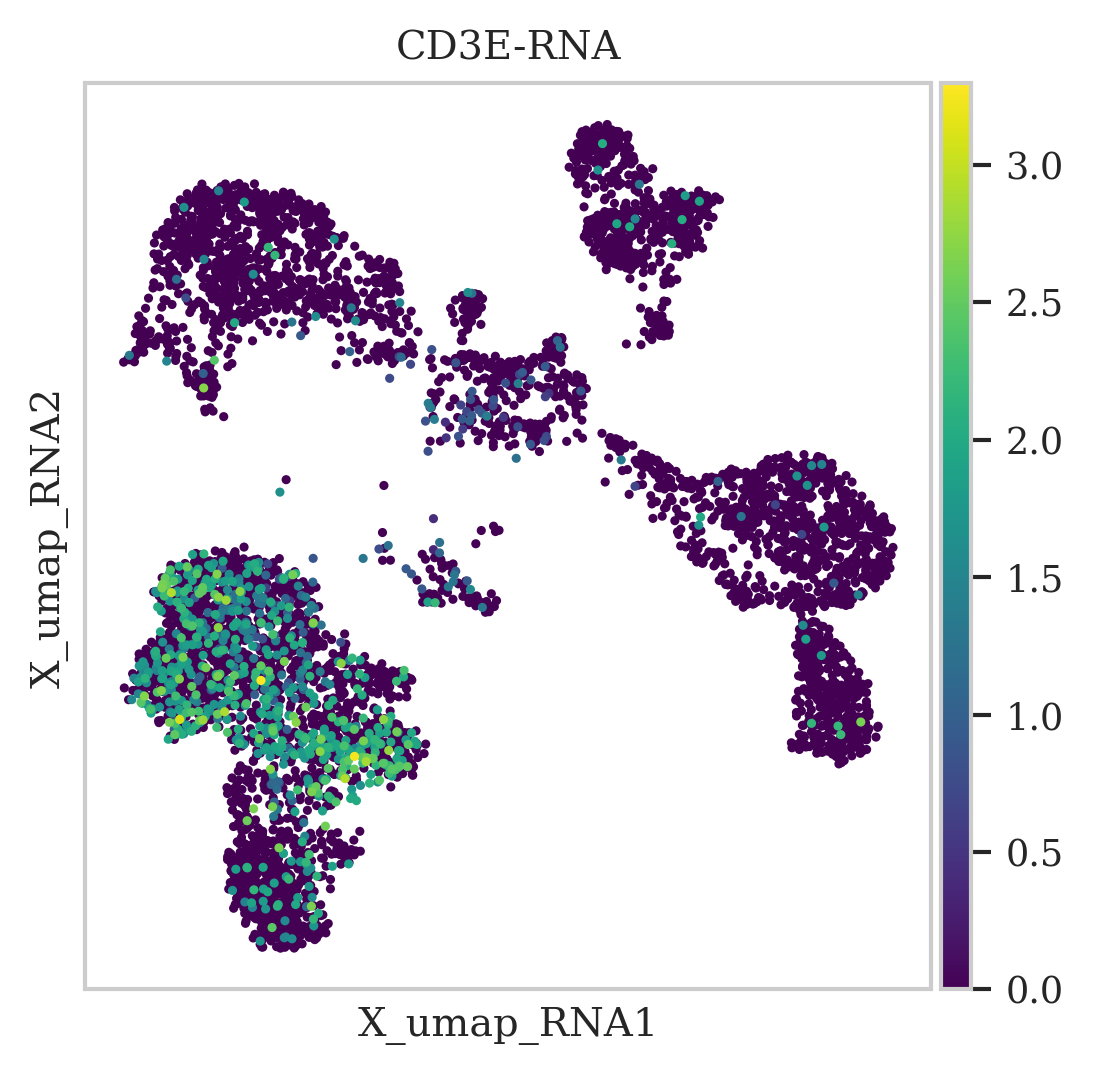

In [94]:
# marker for pan T-cell
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_RNA", color="CD3E-RNA", color_map="viridis",
                    save="_CD3E-RNA.pdf")

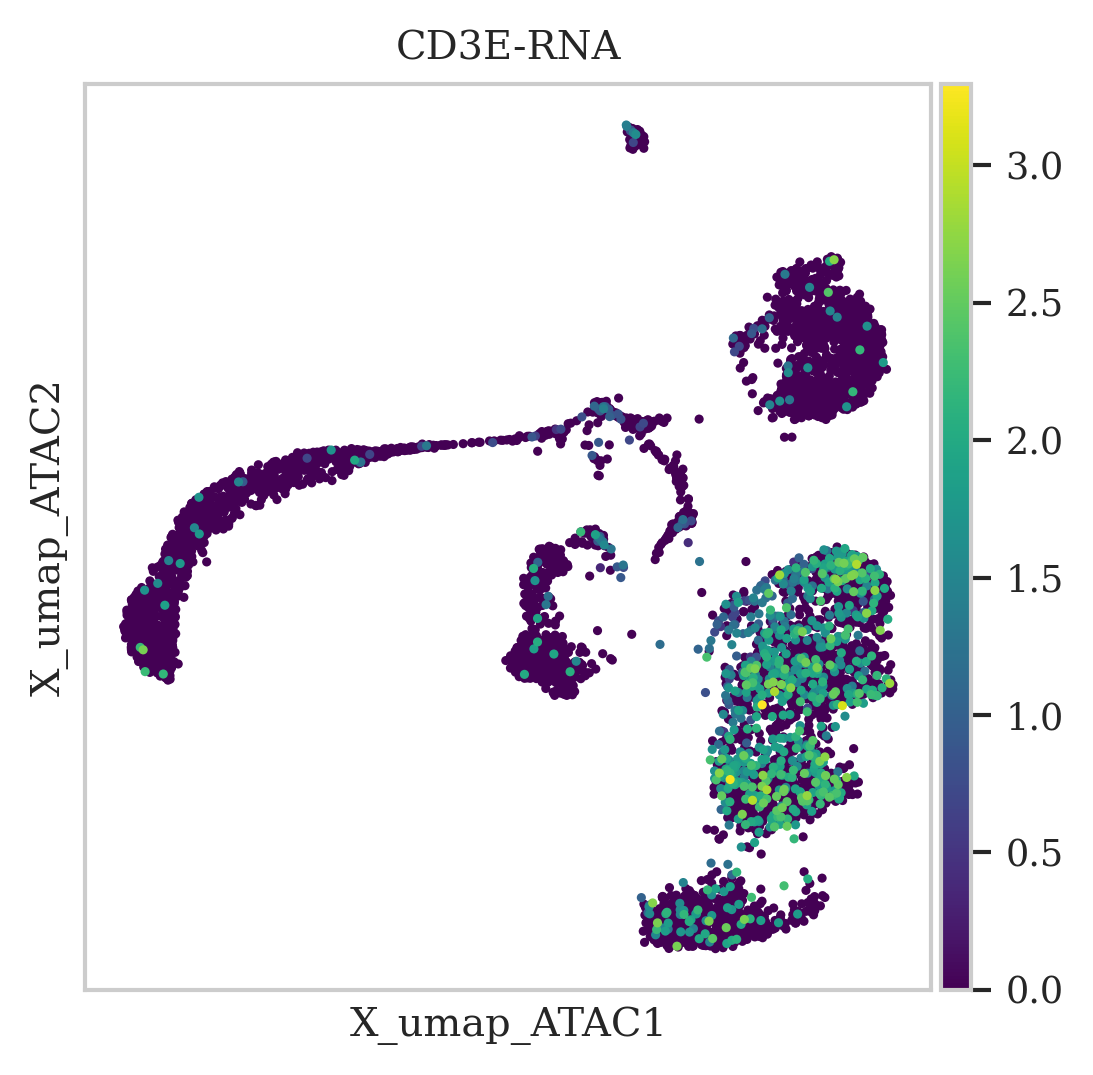

In [96]:
# marker for pan T-cell
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata, basis="X_umap_ATAC", color="CD3E-RNA", color_map="viridis",
                    save="_CD3E-RNA.pdf")

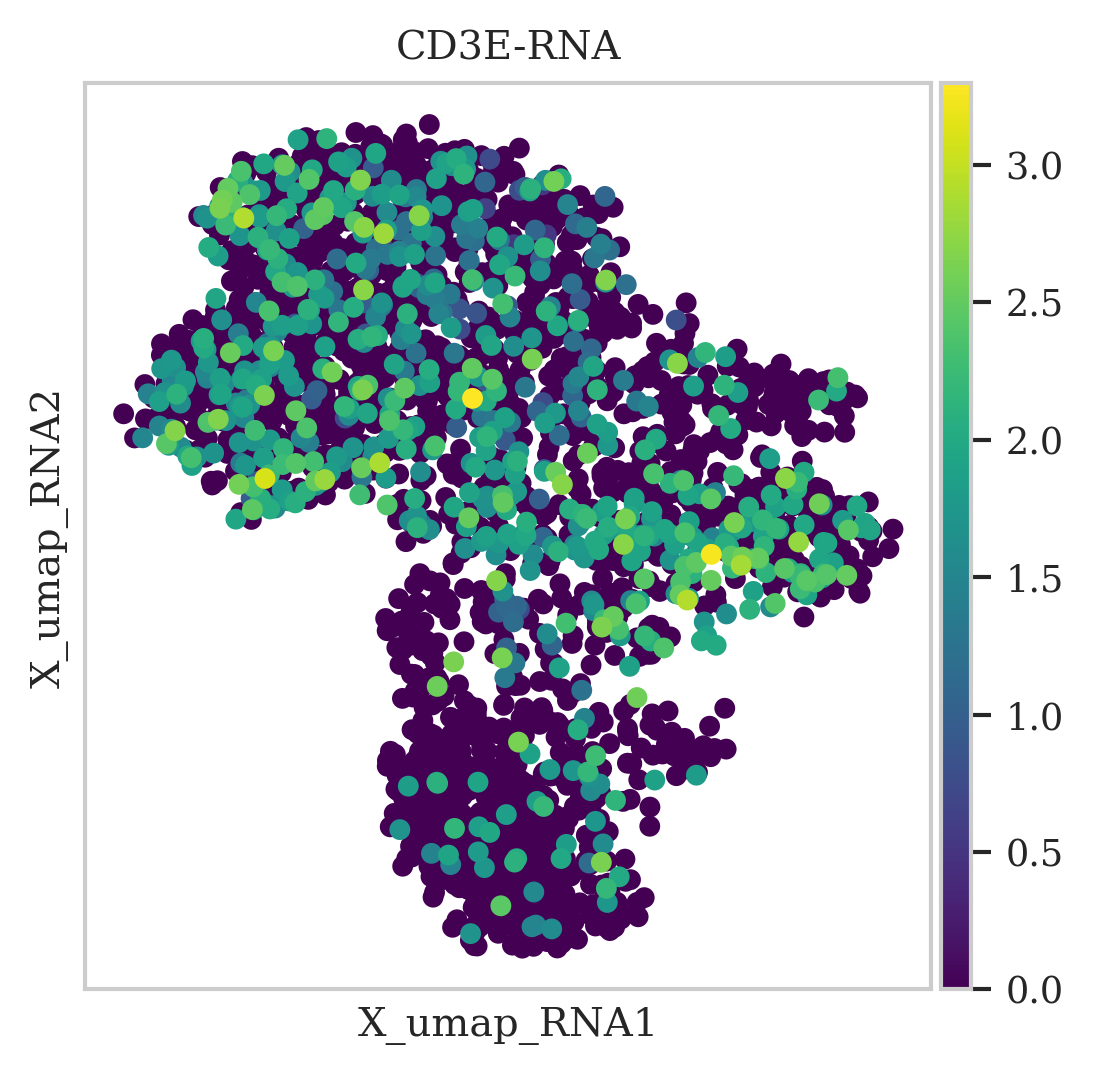

In [103]:
# marker for pan T-cell
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata[adata.obs.manual_annotation_coarse=="T_cells"], 
                    basis="X_umap_RNA", color="CD3E-RNA", size=100, color_map="viridis",
                    save="_Tcells_CD3E-RNA.pdf")

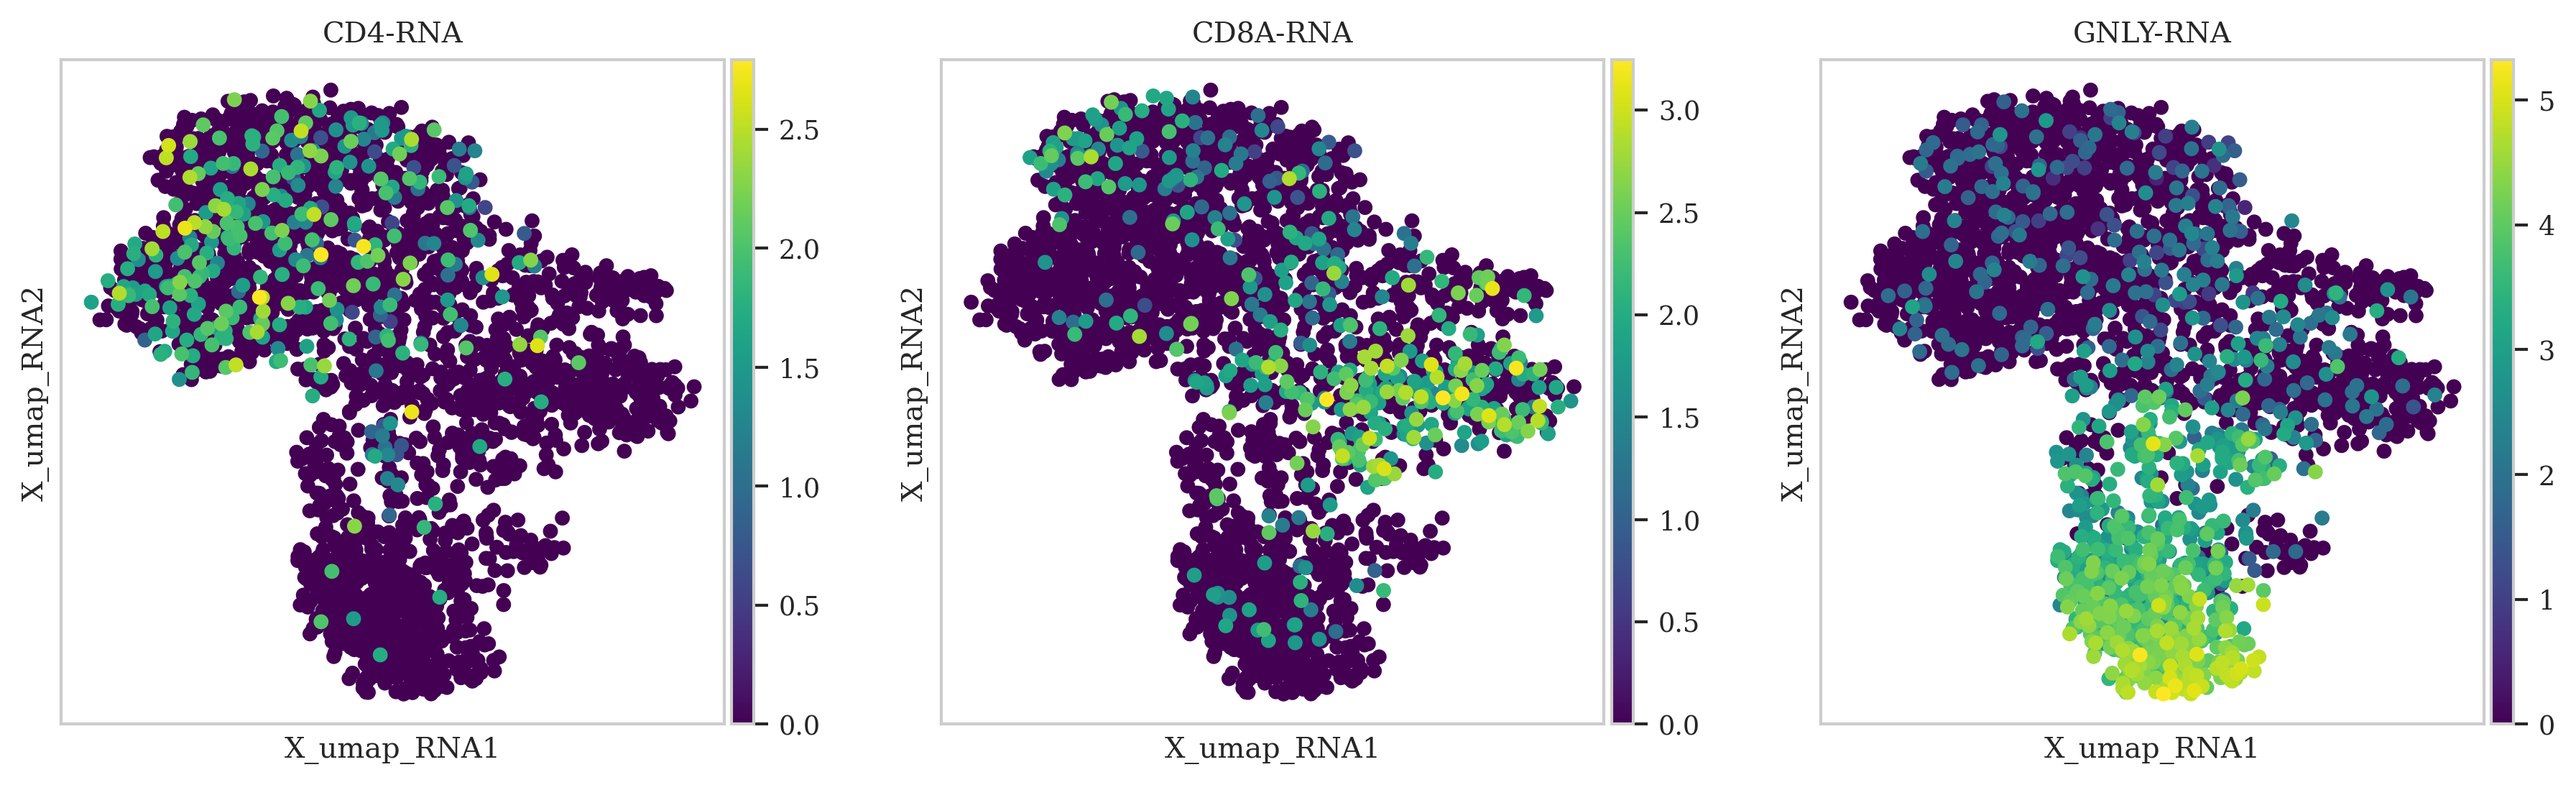

In [104]:
# marker genes for T cell subtypes (CD4, CD8A, GNLY, for CD4 T, CD8 T, or NK cells, respectively)
# RNA(GEX) UMAP
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
    sc.pl.embedding(adata[adata.obs.manual_annotation_coarse=="T_cells"], 
                    basis="X_umap_RNA", color=["CD4-RNA","CD8A-RNA","GNLY-RNA"], 
                    size=100, ncols=3, color_map="viridis",
                    save="_Tcell_subtype_RNA_markers.pdf")